El EDA (Exploratory Data Analysis o Análisis Exploratorio de Datos), tiene como objetivo comprender las principales características del conjunto de datos antes de aplicar los modelos predictivos o realizar análisis estadísticos más profundos. El EDA permite descubrir patrones, detectar anomalías, verificar supuestos y probar hipótesis.

# **1. Carga del dataset internet_final**

In [ ]:
import pandas as pd

internet_df = pd.read_excel('/content/Internet_final.xlsx')


# **2. Análisis exploratorio hoja `Penetracion-hogares`**

## 2.1. Carga de la hoja

Creamos un dataframe con la hoja `Penetración-hogares`del dataset.

In [ ]:
# Cargamos la hoja 'Penetracion-hogares' del archivo
penetracion_hogares_df = pd.read_excel('/content/Internet_final.xlsx', sheet_name='Penetracion-hogares')

# Mostramos las primeras filas para explorar la estructura del dataset
penetracion_hogares_df.head()


,año,trimestre,provincia,accesos_por_cada_100_hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


## 2.2. Estadísticas Descriptivas

Comenzaremos revisando las estadísticas básicas para la penetración de internet por cada 100 hogares.

In [ ]:
# Resumen estadístico de los accesos por cada 100 hogares
penetracion_hogares_df.describe()



,año,trimestre,accesos_por_cada_100_hogares
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,52.159491
std,2.962686,1.128870,24.036101
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.000000,33.204632
50%,2019.000000,2.000000,49.435000
75%,2021.000000,3.000000,65.706626
max,2024.000000,4.000000,124.061394


Este resumen estadístico nos proporciona una visión general de la penetración de internet por cada 100 hogares.

* **Rango de años:** Los datos cubren desde $2014$ hasta $2024$, lo que nos permite ver cómo ha evolucionado la penetración de internet a lo largo del tiempo.

* **Trimestres:** Los trimestres van del $1$ al $4$, lo que indica que se tienen datos para todos los trimestres del año.

* **Penetración de Internet:**
  
  - **Media:** En promedio, hay $52.16$ accesos a internet por cada $100$ hogares.

  - **Desviación estándar (std):** La desviación estándar es de $24.03$, lo que indica que hay una variabilidad considerable en los accesos entre provincias.

  - **Mínimo:** La provincia con menor penetración tiene solo $9.35$ accesos por cada 100 hogares.

  - **Máximo:** La provincia con mayor penetración tiene $124.06$ accesos por cada 100 hogares, lo que significa que algunos hogares pueden tener múltiples conexiones.

  - **Percentiles:**

    - El 25% de las provincias tienen menos de $33.20$ accesos por cada $100$ hogares.

    - El 50% de las provincias (mediana) tienen menos de $49.44$ accesos por cada $100$ hogares.
  
    - El 75% de las provincias tienen menos de $65.71$ accesos por cada $100$ hogares.

## 2.3. Distribución de la penetración de Internet

Creamos un gráfico de distribución de los accesos a internet para visualizar qué provincias tienen mayor o menor penetración.

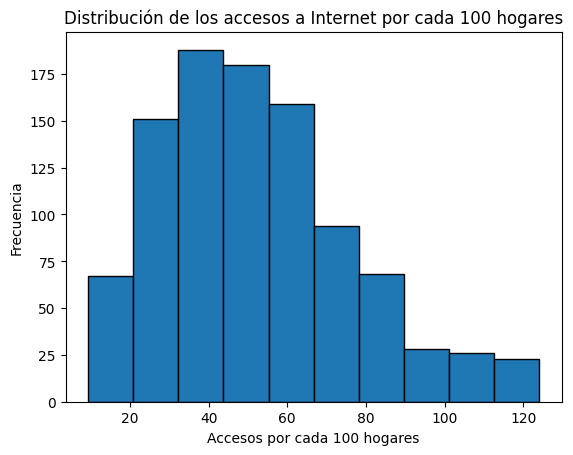

In [ ]:
import matplotlib.pyplot as plt

# Histograma de la penetración de internet
plt.hist(penetracion_hogares_df['accesos_por_cada_100_hogares'], bins=10, edgecolor='black')
plt.title('Distribución de los accesos a Internet por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()


* **Forma de la distribución:**

  * La distribución está sesgada a la derecha, lo que indica que la mayoría de las provincias tienen menos de $80$ accesos por cada $100$ hogares.
  
  * La mayoría de las observaciones se agrupan entre $30$ y $70$ accesos por cada $100$ hogares.

* **Frecuencia de acceso:**

  * Hay un número significativo de provincias (alrededor de $175-200$) con entre $40$ y $60$ accesos por cada $100$ hogares, lo que refleja que esta es una zona común de penetración de internet en el país.

  * Solo unas pocas provincias tienen entre $90$ y $120$ accesos por cada $100$ hogares, lo que indica que una menor cantidad de provincias tiene una alta penetración de internet.

* **Provincias con bajo acceso:**

  * Alrededor de $50$ provincias o localidades tienen entre $10$ y $30$ accesos por cada 100 hogares, lo cual refleja un nivel bajo de conectividad.

* **Provincias con alta penetración:**

  * Las provincias con mayor acceso tienen entre $100$ y $120$ accesos por cada $100$ hogares, pero son pocas comparadas con el resto.

## 2.4. Provincias con mayor y menor acceso

In [ ]:
# Provincias con mayor acceso a Internet
top_provincias = penetracion_hogares_df.sort_values(by='accesos_por_cada_100_hogares', ascending=False).head(5)

# Provincias con menor acceso a Internet
bottom_provincias = penetracion_hogares_df.sort_values(by='accesos_por_cada_100_hogares', ascending=True).head(5)

top_provincias, bottom_provincias


(      año  trimestre        provincia  accesos_por_cada_100_hogares
 649  2017          2  Capital Federal                    124.061394
 601  2017          4  Capital Federal                    122.897424
 121  2022          4  Capital Federal                    122.730000
 97   2023          1  Capital Federal                    122.590000
 145  2022          3  Capital Federal                    122.280000,
       año  trimestre provincia  accesos_por_cada_100_hogares
 978  2014          1  San Luis                      9.347208
 666  2017          2  San Luis                      9.513970
 690  2017          1  San Luis                      9.545500
 786  2016          1  San Luis                      9.586346
 762  2016          2  San Luis                      9.603734)

El análisis de las provincias con mayor y menor acceso a internet revela contrastes significativos entre regiones, destacando una gran disparidad en la penetración del servicio de internet en el país.

**Provincias con mayor acceso a Internet:**

Los cinco registros con mayor penetración de internet pertenecen todos a Capital Federal, lo que refuerza la idea de que esta región tiene una conectividad extremadamente alta. Los accesos por cada $100$ hogares en la Capital Federal superan el $120\%$, lo que indica que, en promedio, muchos hogares tienen más de una conexión a internet. Los valores más altos son:

* $124.06$ accesos por cada $100$ hogares en el segundo trimestre de $2017$.

* Le siguen valores muy similares, todos por encima de $122$ accesos por cada $100$ hogares en trimestres entre $2017$ y $2023$.

Este comportamiento refleja que la Capital Federal de Argentina, al ser la principal área urbana del país, tiene una infraestructura digital avanzada que no solo cubre la demanda de acceso a internet, sino que también permite que muchos hogares tengan más de una conexión. Este nivel de conectividad es indicativo de un entorno socioeconómico favorable, donde la disponibilidad de múltiples dispositivos y servicios de internet es una norma, lo que probablemente se relaciona con la alta densidad de población y actividad económica de la región.

**Provincias con menor acceso a Internet:**

En el otro extremo, San Luis aparece consistentemente como la provincia con menor penetración de internet. En los cinco registros más bajos, los accesos por cada $100$ hogares se sitúan entre $9.34$ y $9.60$ accesos, todos ellos en trimestres entre $2014$ y $2017$. Estos valores extremadamente bajos reflejan una situación crítica en términos de conectividad:

* En $2014$, el acceso más bajo se registra con $9.34$ accesos por cada $100$ hogares, lo que indica que una gran mayoría de la población no tiene acceso a internet en esa provincia.

* Los otros registros, aunque muestran una leve mejora, siguen siendo preocupantemente bajos, rondando los $9.60$ accesos por cada $100$ hogares hasta $2017$.

Este nivel de acceso es extremadamente bajo, reflejando que gran parte de la población en San Luis no cuenta con acceso regular a internet. Esto puede estar relacionado con factores como la dispersión geográfica de la población, la falta de infraestructura digital adecuada o barreras económicas que impiden un mayor nivel de penetración. El hecho de que estos registros pertenezcan a años anteriores sugiere que podría haber habido mejoras desde entonces, pero en estos años San Luis estaba considerablemente rezagada en términos de conectividad.

# **3. Análisis exploratorio hoja `Accesos por velocidad`**

## 3.1. Carga de la hoja

In [ ]:
# Cargamos la hoja 'Accesos por velocidad' del archivo Excel
accesos_velocidad_df = pd.read_excel('/content/Internet_final.xlsx', sheet_name='Accesos por velocidad')

# Mostramos las primeras filas para explorar la estructura del dataset
accesos_velocidad_df.head()


,año,trimestre,provincia,hasta_512_kbps,_512_kbps__1_mbps,_1_mbps__6_mbps,_6_mbps__10_mbps,_10_mbps__20_mbps,_20_mbps__30_mbps,_30_mbps,otros,total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640,170676.0


## 3.2. Estadísticas Descriptivas

In [ ]:
# Resumen estadístico de accesos_velocidad
accesos_velocidad_df.describe()


,año,trimestre,hasta_512_kbps,_512_kbps__1_mbps,_1_mbps__6_mbps,_6_mbps__10_mbps,_10_mbps__20_mbps,_20_mbps__30_mbps,_30_mbps,otros,total
count,978.000000,978.000000,978.000000,978.00000,9.780000e+02,978.000000,978.000000,978.000000,9.780000e+02,978.000000,9.780000e+02
mean,2018.656442,2.466258,1979.014315,9187.00818,1.348622e+05,38195.466258,37015.957055,19882.338446,1.159074e+05,6267.931493,3.632972e+05
std,3.011504,1.131745,12795.260845,20849.51674,3.254977e+05,64389.786285,88758.064827,69416.840262,4.514186e+05,14923.597928,7.824756e+05
min,2014.000000,1.000000,6.000000,0.00000,1.336000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,44.250000,395.00000,2.412100e+04,3661.500000,2380.750000,40.000000,1.125000e+01,0.000000,6.135375e+04
50%,2019.000000,2.000000,107.000000,2235.00000,4.285500e+04,13156.000000,10178.500000,1573.000000,3.308500e+03,165.500000,1.109070e+05
75%,2021.000000,3.000000,468.000000,7040.50000,8.389300e+04,41242.000000,26442.000000,10026.750000,3.937775e+04,6617.250000,1.914005e+05
max,2024.000000,4.000000,238920.000000,171244.48000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125147.000000,5.044557e+06


El análisis de las estadísticas descriptivas del dataset `Accesos por velocidad `nos muestra información sobre la distribución de las velocidades de acceso a internet en las distintas provincias del país.

* **Rango temporal (año y trimestre):**

  * Los datos cubren el periodo de $2014$ a $2024$, lo que ofrece un amplio panorama sobre la evolución de los accesos a internet a lo largo del tiempo.

  * El valor medio para el año es $2018.65$, indicando que la mayoría de los registros se encuentran hacia el centro de este rango temporal.

  * Los datos abarcan los cuatro trimestres del año, lo que permite observar posibles variaciones estacionales en el acceso a internet.

* **Accesos por velocidad:**

  Los accesos a internet se agrupan en diferentes categorías de velocidad. Revisemos el comportamiento de cada una de estas categorías:

  * **Hasta 512 kbps:**Este tipo de conexiones extremadamente lentas tiene una media de $1979$ accesos, pero presenta una alta variabilidad con una desviación estándar de $12.795$. El acceso máximo es extremadamente alto, con $238.920$ accesos, lo que podría indicar una concentración inusual de este tipo de conexiones en una provincia específica o un posible valor atípico. A pesar de esto, el percentil $75$ ($468$ accesos) sugiere que en la mayoría de las provincias, el número de accesos de baja velocidad es mucho menor, lo que indica que las conexiones lentas están disminuyendo.

  * **512 kbps - 1 Mbps:** La media es de $9.187$ accesos, con una desviación estándar de $20849$, lo que sugiere una gran variabilidad en las provincias. El valor máximo es $171.244$ accesos, lo que muestra que todavía hay una importante cantidad de usuarios con conexiones de velocidad baja. Sin embargo, la mitad de las provincias (percentil $50$) tienen menos de $2.235$ accesos en esta categoría, lo que refleja una tendencia hacia velocidades más altas en la mayoría de las regiones.

  * **1 Mbps - 6 Mbps:** Esta categoría tiene un promedio de $134.862$ accesos, lo que refleja que esta es una velocidad común en muchas provincias. La variabilidad es alta, con un máximo de $2.299.705$ accesos, lo que indica que hay provincias donde este rango de velocidad es el más utilizado. La mediana es $42.855$ accesos, lo que implica que la mitad de las provincias tienen menos de este número de accesos en este rango.

  * **6 Mbps - 10 Mbps:** Las conexiones de entre $6$ y $10$ Mbps son cada vez más comunes, con una media de $38.195$ accesos y un máximo de $403.575$ accesos. El percentil $50$ muestra que la mitad de las provincias tienen menos de $13.156$ accesos en esta categoría, lo que indica que esta velocidad está presente, pero aún no predomina en la mayoría de las provincias.

  * **10 Mbps - 20 Mbps:** Con una media de $37.016$ accesos y una alta desviación estándar, este rango de velocidad sigue creciendo en popularidad.
  Sin embargo, el percentil $75$ muestra que solo un cuarto de las provincias tienen más de $26.442$ accesos en este rango, lo que significa que aún no es una opción dominante en la mayoría de las regiones.

  * **20 Mbps - 30 Mbps:** Este rango de velocidad es mucho menos común, con una media de $19.882$ accesos. Las conexiones de alta velocidad están presentes en menor medida en muchas provincias. A pesar de esto, hay provincias con hasta $949.093$ accesos en este rango, lo que demuestra que en ciertas áreas la infraestructura de alta velocidad ya está bien establecida.

  * **Más de 30 Mbps:** Las conexiones de más de $30$ Mbps tienen el valor más alto de todas las categorías, con una media de $115.907$ accesos y un valor máximo de $4.068.292$ accesos. Este tipo de conexiones se está volviendo más común, especialmente en áreas con alta densidad de población o mejor infraestructura. El percentil $50$ es bajo, con solo $3.308$ accesos, lo que indica que aún hay muchas provincias donde esta velocidad no está generalizada.

* **Categoría "otros":**

  Esta columna parece agrupar accesos que no encajan en ninguna de las categorías definidas de velocidad. La media es de $6267$ accesos, pero los valores son extremadamente variables, con un valor máximo negativo de $-1945$ accesos, lo que sugiere posibles inconsistencias o errores en los datos.

* **Total de accesos:**

  El total de accesos a internet en cada provincia tiene una media de $363.297$ accesos, con un máximo de $5.044.557. Esto muestra una fuerte concentración en ciertas provincias con infraestructura avanzada, mientras que en otras, el acceso es mucho más limitado.

## 3.3. Distribución de los accesos por velocidad

Visualizamos la distribución de los accesos en los diferentes rangos de velocidad para entender qué tipo de conexión es más común en las provincias.

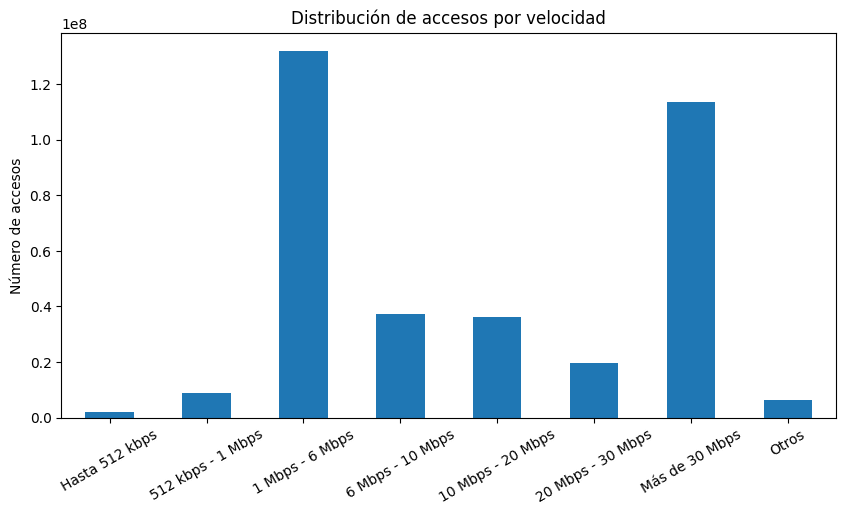

In [ ]:
# Creamos un gráfico de barras apiladas para visualizar los accesos por categoría de velocidad
plt.figure(figsize=(10, 5))  # Ajustar el tamaño de la figura (más ancho)

# Crear el gráfico de barras
ax = accesos_velocidad_df[['hasta_512_kbps', '_512_kbps__1_mbps', '_1_mbps__6_mbps', '_6_mbps__10_mbps', '_10_mbps__20_mbps', '_20_mbps__30_mbps', '_30_mbps', 'otros']].sum().plot(kind='bar', stacked=True)

# Título y etiqueta del eje Y
plt.title('Distribución de accesos por velocidad')
plt.ylabel('Número de accesos')

# Cambiar los rótulos del eje X y rotarlos 30°
ax.set_xticklabels(['Hasta 512 kbps', '512 kbps - 1 Mbps', '1 Mbps - 6 Mbps', '6 Mbps - 10 Mbps', '10 Mbps - 20 Mbps', '20 Mbps - 30 Mbps', 'Más de 30 Mbps', 'Otros'], rotation=30)

# Mostrar el gráfico
plt.show()


Este gráfico muestra claramente que, aunque las velocidades entre $1$ Mbps y $6$ Mbps siguen dominando, hay un crecimiento significativo en las conexiones de más de $30$ Mbps, lo que refleja una mejora en la infraestructura de telecomunicaciones. Las conexiones más lentas están siendo gradualmente reemplazadas, pero todavía existen usuarios en estos rangos que podrían estar limitados por la geografía o la economía.

## 2.4. Comparación de provincias

Identificamos qué provincias tienen más acceso a conexiones de alta velocidad (por encima de 30 Mbps) y cuáles siguen teniendo conexiones lentas (por debajo de 1 Mbps).

In [ ]:
# Provincias con más accesos a velocidades superiores a 30 Mbps
top_high_speed = accesos_velocidad_df.sort_values(by='_30_mbps', ascending=False).head(5)

# Provincias con más accesos a velocidades inferiores a 1 Mbps
top_low_speed = accesos_velocidad_df.sort_values(by='hasta_512_kbps', ascending=False).head(5)

top_high_speed, top_low_speed


(     año  trimestre     provincia  hasta_512_kbps  _512_kbps__1_mbps  \
 0   2024          1  Buenos Aires         26002.0            22510.0   
 24  2024          4  Buenos Aires         26909.0            23962.0   
 48  2023          3  Buenos Aires         27440.0            24820.0   
 72  2023          2  Buenos Aires         28007.0            24674.0   
 96  2023          1  Buenos Aires         28615.0            25137.0   
 
     _1_mbps__6_mbps  _6_mbps__10_mbps  _10_mbps__20_mbps  _20_mbps__30_mbps  \
 0          221185.0          233225.0           241778.0           106418.0   
 24         228393.0          239339.0           246144.0           110876.0   
 48         242010.0          241310.0           246076.0           112159.0   
 72         246067.0          253078.0           245505.0           107502.0   
 96         249864.0          264388.0           241923.0           104495.0   
 
      _30_mbps   otros      total  
 0   4068292.0  125147  5044557.0  
 24  4

**Tendencia a la mejora de la velocidad:** La tendencia general en Buenos Aires muestra una clara migración desde las conexiones de baja velocidad hacia las conexiones más rápidas, especialmente en la categoría de más de $30$ Mbps, que ahora domina el mercado.

**Disminución de conexiones lentas:** Las conexiones de baja velocidad (por debajo de $512$ kbps) han ido disminuyendo consistentemente en los últimos años, lo que indica una mejora en la infraestructura y una preferencia por velocidades más rápidas.

**Madurez del mercado:** La ligera disminución en el total de accesos en años recientes sugiere que el mercado de internet en Buenos Aires ha alcanzado una fase de madurez, donde la mayoría de los hogares ya tienen acceso a internet y la tasa de crecimiento de nuevos accesos ha disminuido.

# **4. Análisis exploratorio hoja `Accesos_tecnología_localidad`**

## 4.1. Carga de la hoja

In [ ]:
# Cargamos la hoja 'Accesos_tecnologia_localidad' del archivo Excel
accesos_tecnologia_localidad_df = pd.read_excel('/content/Internet_final.xlsx', sheet_name='Accesos_tecnologia_localidad')

# Mostramos las primeras filas para explorar la estructura del dataset
accesos_tecnologia_localidad_df.head()


,provincia,partido,localidad,link_indec,adsl,cablemodem,dial_up,fibra_optica,otros,satelital,wimax,wireless,total_general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


El dataset `Accesos_tecnología_localidad` contiene información sobre los accesos a internet desglosados por tecnología en distintas localidades dentro de cada provincia.

## 4.2. Estadísticas Descriptivas

Revisaremos las estadísticas básicas del dataset, especialmente en cuanto al total de accesos y la distribución de las tecnologías de acceso.

In [ ]:
# Resumen estadístico del dataset
accesos_tecnologia_localidad_df.describe()


,adsl,cablemodem,dial_up,fibra_optica,otros,satelital,wimax,wireless,total_general
count,3072.000000,3.072000e+03,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3.072000e+03
mean,252.107747,1.948879e+03,3.838867,1306.999023,78.460286,0.953776,0.712240,194.883464,3.786835e+03
std,1617.786217,2.278130e+04,43.181703,8894.629351,1057.810117,13.610929,15.102835,751.069544,3.174705e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.775000e+01
50%,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,1.680000e+02
75%,64.000000,8.250000e+00,0.000000,160.000000,0.000000,1.000000,0.000000,128.000000,1.034500e+03
max,70108.000000,1.177475e+06,2050.000000,281390.000000,46762.000000,742.000000,444.000000,19906.000000,1.504711e+06


**ADSL**

* **Media:** El promedio de accesos ADSL es de $252$ accesos por localidad.

* **Desviación estándar:** La desviación estándar es muy alta, $1617$ accesos, lo que indica una variabilidad significativa entre localidades.

* **Mínimo y máximo:** Algunas localidades no tienen acceso a ADSL (mínimo de $0$), mientras que otras cuentan con hasta $70.108$ accesos. Esta disparidad sugiere que en algunas regiones, ADSL sigue siendo una tecnología predominante, mientras que en otras ha sido reemplazada o simplemente no está disponible.

* **Percentiles:** El $50\%$ de las localidades no tienen acceso a ADSL, mientras que solo el $25\%$ superior tiene más de $64$ accesos. Esto refleja que ADSL, una tecnología más antigua, ha dejado de ser la opción principal en muchas áreas.

**Cablemódem**

* **Media:** En promedio, hay $1.949$ accesos por localidad para esta tecnología.

* **Desviación estándar:** Con una desviación estándar muy alta ($22.781$), se observa una fuerte variabilidad entre localidades.

* **Mínimo y máximo:** Aunque algunas localidades no tienen acceso a cablemódem, otras llegan hasta $1.177.475$ accesos, lo que indica que esta tecnología es altamente predominante en áreas urbanas densamente pobladas.

* **Percentiles:** El $75\%$ de las localidades tiene menos de $8,25$ accesos, lo que sugiere que esta tecnología es dominante solo en un pequeño número de localidades.

**Dial-Up**

* **Media:** El acceso promedio es muy bajo, con solo $3,8$ accesos por localidad.

* **Desviación estándar:** A pesar de la baja media, la desviación estándar es de $43$ accesos, lo que sugiere que en algunas localidades aún se utiliza.

* **Percentiles:** El $50\%$ de las localidades no tienen acceso a `Dial-Up`, lo cual es esperable, ya que esta es una tecnología obsoleta.

* **Máximo:** El máximo de $2050$ accesos indica que hay algunas localidades donde todavía se utiliza esta tecnología, aunque de manera residual.

**Fibra óptica**

* **Media:** El acceso medio a fibra óptica es de $1307$ accesos por localidad.

* **Desviación estándar:** Al igual que otras tecnologías, la variabilidad es alta, con una desviación estándar de $8894$ accesos.

* **Mínimo y máximo:** Algunas localidades aún no tienen acceso a fibra óptica, mientras que otras pueden contar con hasta $281.390$ accesos. Esto indica que la fibra óptica es más común en grandes áreas metropolitanas o ciudades con mejor infraestructura.

* **Percentiles:** El $75\%$ de las localidades tienen menos de $160$ accesos, lo que sugiere que la expansión de la fibra óptica aún está en desarrollo en muchas áreas.

**Otros tipos de conexión**

* **Otros:** Con una media de $78$ accesos y un máximo de $46.762$ accesos, esta categoría parece capturar tecnologías menos comunes o más específicas, pero con una notable dispersión entre localidades.

* **Satelital:** Es una de las tecnologías menos comunes, con un promedio de menos de $1$ acceso por localidad y un máximo de $742$ accesos. Esto refleja su uso limitado en áreas remotas o rurales donde otras formas de conectividad no están disponibles.

* **WiMAX:** La penetración de `WiMAX` es baja, con una media de $0,7$ accesos y un máximo de $444$ accesos, lo que indica que esta tecnología tiene un uso muy limitado en el país.

* **Wireless:** El acceso promedio es de $195$ accesos por localidad, pero hay una alta variabilidad, con un máximo de $19.906$ accesos.

## 4.3. Distribución de accesos por tecnología

Creamos un gráfico que muestre la distribución del uso de cada tipo de tecnología (ADSL, fibra óptica, cablemódem, etc.) para identificar cuáles son las más y menos comunes.

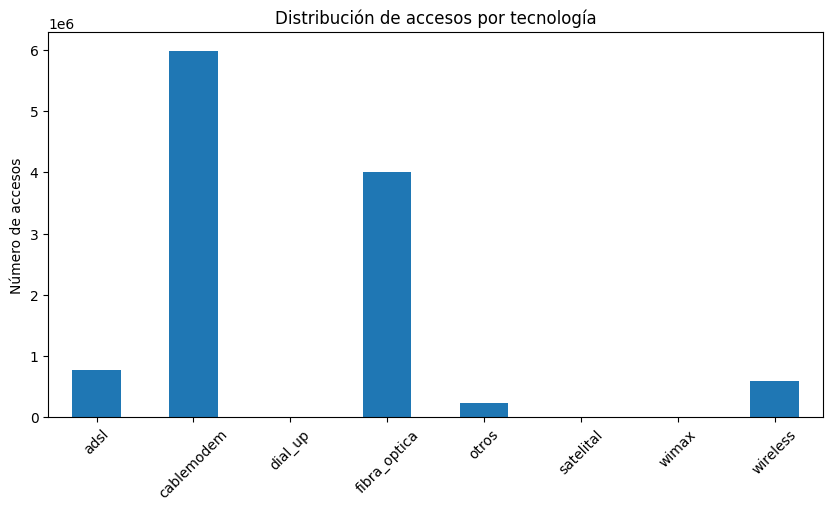

In [ ]:
import matplotlib.pyplot as plt

# Manejamos el tamaño de la figura
plt.figure(figsize=(10, 5))  # Ajuste del tamaño para ampliar el eje X

# Sumamos accesos por tecnología a nivel global
tecnologias = ['adsl', 'cablemodem', 'dial_up', 'fibra_optica', 'otros', 'satelital', 'wimax', 'wireless']
accesos_tecnologia_localidad_df[tecnologias].sum().plot(kind='bar', stacked=True)

# Etiquetas y título
plt.title('Distribución de accesos por tecnología')
plt.ylabel('Número de accesos')

# Inclinamos los rótulos del eje X a 45 grados
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()


**Cablemódem y fibra óptica dominan:** Estas dos tecnologías son las más predominantes, con una ventaja considerable del cablemódem. Esto sugiere que la infraestructura de internet en muchas localidades sigue dependiendo del cablemódem, pero la fibra óptica está ganando terreno.

**El declive de ADSL:** Aunque aún está presente, `ADSL` está claramente en declive a medida que otras tecnologías más modernas y rápidas se consolidan.

**Tecnologías alternativas:** Tecnologías como `wireless` y `satelital` se siguen utilizando en zonas donde otras opciones no son viables, aunque en menor medida.

## 4.4. Provincias con mayor y menor acceso a fibra óptica

Dado que la fibra óptica es una de las tecnologías más avanzadas, podemos identificar qué provincias tienen mayor acceso a esta tecnología y cuáles tienen menos.

In [ ]:
# Provincias con mayor acceso a fibra óptica
top_fibra_optica = accesos_tecnologia_localidad_df.groupby('provincia')['fibra_optica'].sum().sort_values(ascending=False).head(5)

# Provincias con menor acceso a fibra óptica
bottom_fibra_optica = accesos_tecnologia_localidad_df.groupby('provincia')['fibra_optica'].sum().sort_values(ascending=True).head(5)

top_fibra_optica, bottom_fibra_optica


(provincia
 BUENOS AIRES    1799013
 CORDOBA          458985
 SANTA FE         374288
 TUCUMAN          205959
 CABA             203756
 Name: fibra_optica, dtype: int64,
 provincia
 TIERRA DEL FUEGO        3684
 FORMOSA                17908
 LA RIOJA               23086
 CHUBUT                 26356
 SANTIAGO DEL ESTERO    27018
 Name: fibra_optica, dtype: int64)

**Provincias con mayor acceso a fibra óptica**

* **Buenos Aires:** Con $1.799.013$ accesos, es la provincia con mayor adopción de fibra óptica, superando por un amplio margen al resto del país. Esto no es sorprendente dado que Buenos Aires es la provincia más poblada y tiene la mayor infraestructura urbana. La alta demanda de internet de alta velocidad en la región, tanto para uso residencial como comercial, ha impulsado la expansión de la fibra óptica.

* **Córdoba:** Con $458.985$ accesos, Córdoba ocupa el segundo lugar. Esta provincia, que es uno de los principales centros urbanos y económicos de Argentina, también ha visto un crecimiento en la adopción de la fibra óptica, lo que indica que la tecnología se está extendiendo fuera de Buenos Aires.

* **Santa Fe:** Con $374.288$ accesos, Santa Fe sigue a Córdoba, reflejando la importancia de esta tecnología en provincias con grandes centros urbanos, como Rosario, que demandan conexiones de alta velocidad.

* **Tucumán:** Con $205.959$ accesos, Tucumán se destaca como la principal provincia del noroeste argentino en cuanto a la adopción de fibra óptica. A pesar de ser más pequeña en población que las provincias líderes, la inversión en infraestructura ha permitido que la fibra óptica llegue a un número considerable de usuarios.

* **CABA (Ciudad Autónoma de Buenos Aires):** A pesar de ser la capital del país, la Ciudad Autónoma de Buenos Aires (CABA) tiene $203.756$ accesos, ocupando el quinto lugar. Esto puede deberse a la gran concentración de otras tecnologías, como el cablemódem, que sigue siendo fuerte en esta zona debido a la infraestructura previa.

**Provincias con menor acceso a fibra óptica**

* **Tierra del Fuego:** Con solo $3.684$ accesos, es la provincia con menor adopción de fibra óptica en Argentina. Esto se debe a la lejanía y aislamiento geográfico de la provincia, lo que dificulta la instalación de la infraestructura necesaria para ofrecer fibra óptica.

* **Formosa:** Con $17.908$ accesos, Formosa es otra de las provincias con menor acceso a fibra óptica, lo que refleja una falta de infraestructura digital avanzada en esta región, probablemente debido a su menor población y menor desarrollo económico en comparación con otras provincias.

* **La Rioja:** Con $23.086$ accesos, La Rioja también se encuentra entre las provincias con menos adopción de fibra óptica. Como muchas otras provincias del norte de Argentina, enfrenta desafíos geográficos y económicos que han ralentizado la expansión de esta tecnología.

* **Chubut:** Con $26.356$ accesos, Chubut, una provincia patagónica, también presenta limitaciones en términos de acceso a fibra óptica, posiblemente debido a la dispersión de su población en áreas remotas.

* **Santiago del Estero:** Con $27.018$ accesos, Santiago del Estero es otra provincia del noroeste argentino donde la adopción de fibra óptica ha sido lenta. Esto indica que las áreas rurales y las provincias más alejadas de los centros urbanos están teniendo dificultades para ponerse al día en cuanto a la adopción de tecnologías de conectividad más modernas.

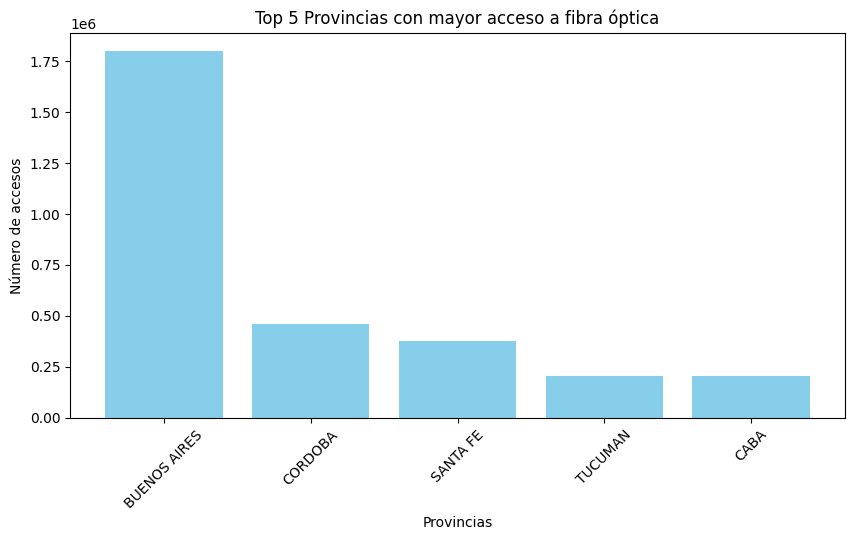

In [ ]:
# Datos de las provincias con mayor y menor acceso a fibra óptica
mayor_fibra = {'BUENOS AIRES': 1799013, 'CORDOBA': 458985, 'SANTA FE': 374288, 'TUCUMAN': 205959, 'CABA': 203756}
menor_fibra = {'TIERRA DEL FUEGO': 3684, 'FORMOSA': 17908, 'LA RIOJA': 23086, 'CHUBUT': 26356, 'SANTIAGO DEL ESTERO': 27018}

# Creamos un gráfico para provincias con mayor acceso a fibra óptica
plt.figure(figsize=(10, 5))
plt.bar(mayor_fibra.keys(), mayor_fibra.values(), color='skyblue')
plt.title('Top 5 Provincias con mayor acceso a fibra óptica')
plt.ylabel('Número de accesos')
plt.xlabel('Provincias')
plt.xticks(rotation=45)
plt.show()

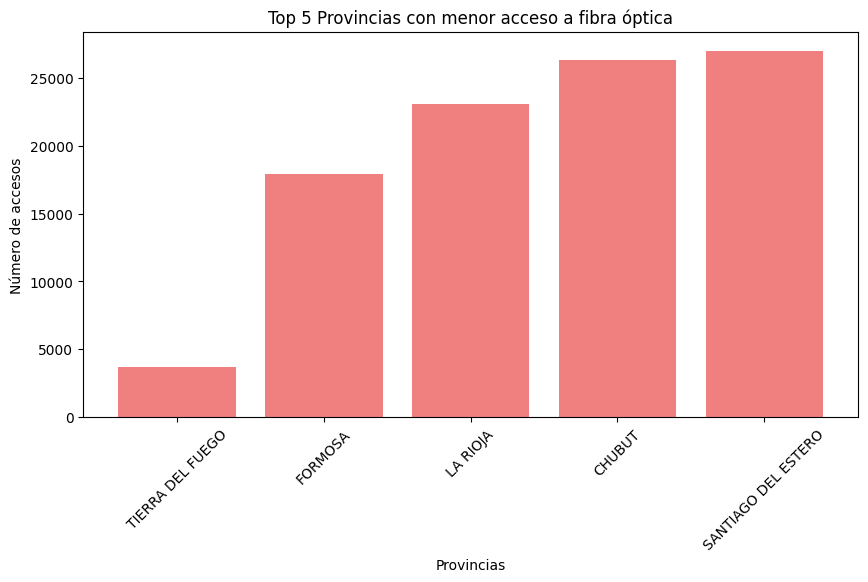

In [ ]:
# Creamos un gráfico para provincias con menor acceso a fibra óptica
plt.figure(figsize=(10, 5))
plt.bar(menor_fibra.keys(), menor_fibra.values(), color='lightcoral')
plt.title('Top 5 Provincias con menor acceso a fibra óptica')
plt.ylabel('Número de accesos')
plt.xlabel('Provincias')
plt.xticks(rotation=45)
plt.show()

## 4.5. Análisis por localidad

 Identificamos las localidades con el mayor y menor total de accesos a internet, para observar cómo la conectividad varía a nivel local.

In [ ]:
# Localidades con mayor acceso a internet
top_localidades = accesos_tecnologia_localidad_df.sort_values(by='total_general', ascending=False).head(5)

# Localidades con menor acceso a internet
bottom_localidades = accesos_tecnologia_localidad_df.sort_values(by='total_general', ascending=True).head(5)

top_localidades, bottom_localidades


(         provincia                          partido  \
 715           CABA  Ciudad Autónoma de Buenos Aires   
 955        CORDOBA                          Capital   
 2728      SANTA FE                          Rosario   
 264   BUENOS AIRES               General Pueyrredón   
 365   BUENOS AIRES                         La Plata   
 
                             localidad link_indec   adsl  cablemodem  dial_up  \
 715   Ciudad Autónoma de Buenos Aires    2000010  70108     1177475     2050   
 955                           Córdoba   14014010  28677      206084       42   
 2728                          Rosario   82084270   8813      164525       71   
 264                     Mar del Plata    6357110   9494      115206      512   
 365                          La Plata    6441030   7362      136126      517   
 
       fibra_optica  otros  satelital  wimax  wireless  total_general  
 715         203756  46762         67      0      4493        1504711  
 955         281390   1218    

**Localidades con mayor conectividad**

Este grupo incluye las localidades con mayor número de accesos a internet y destaca por la adopción de tecnologías más avanzadas como fibra óptica y cablemódem. Las localidades en este grupo son:

* **Ciudad Autónoma de Buenos Aires (CABA):**

    * Fibra óptica: 203.756 accesos.

    * Cablemódem: 1.177.475 accesos, lo que la convierte en la tecnología dominante.

    * Total de accesos: 1.504.711 accesos en total, lo que muestra una infraestructura muy avanzada y una alta penetración de internet en la capital del país.

* **Córdoba (Capital):**

    * Fibra óptica: 281.390 accesos, superando a CABA en esta categoría.

    * Cablemódem: 206.084 accesos, una tecnología que sigue siendo fuerte, aunque con menos penetración que en CABA.

  * Total de accesos: 521.778 accesos, destacando como una de las ciudades con mejor infraestructura.

* **Rosario (Santa Fe):**

    * Fibra óptica: 184.903 accesos.

    * Cablemódem: 164.525 accesos.

    * Total de accesos: 363.684, lo que refleja una infraestructura en crecimiento, con una fuerte presencia de fibra óptica.

* **Mar del Plata (Buenos Aires):**

    * Fibra óptica: 149.753 accesos.

    * Cablemódem: 115.206 accesos.

    * Total de accesos: 276.466, lo que destaca la importancia de esta ciudad como centro turístico y urbano con acceso a tecnologías avanzadas.

* **La Plata (Buenos Aires):**

    * Fibra óptica: 54.565 accesos.

    * Cablemódem: 136. 126 accesos.

    * Total de accesos: 205.138, una ciudad que también muestra una infraestructura avanzada con un buen acceso a tecnologías de alta velocidad.

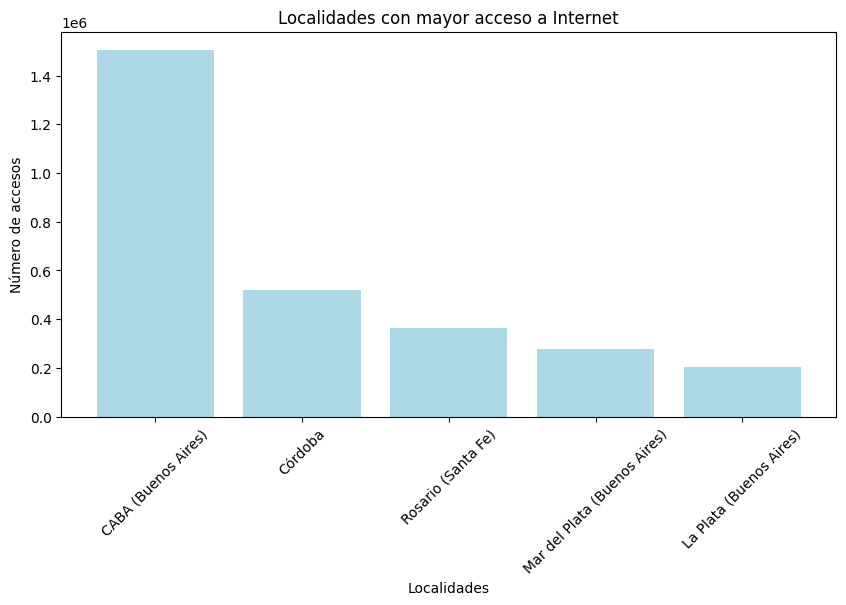

In [22]:
# Datos para las localidades con mayor acceso a internet
mayor_accesos = {
    'CABA (Buenos Aires)': 1504711,
    'Córdoba': 521778,
    'Rosario (Santa Fe)': 363684,
    'Mar del Plata (Buenos Aires)': 276466,
    'La Plata (Buenos Aires)': 205138
}


# Gráfico para las localidades con mayor acceso a internet
plt.figure(figsize=(10, 5))
plt.bar(mayor_accesos.keys(), mayor_accesos.values(), color='lightblue')
plt.title('Localidades con mayor acceso a Internet')
plt.ylabel('Número de accesos')
plt.xlabel('Localidades')
plt.xticks(rotation=45)
plt.show()

**Localidades con nula conectividad**

Este grupo incluye localidades que no tienen acceso a ninguna tecnología de internet, mostrando una situación de desconexión digital total:

* **El Puesto (San Luis):**

    * No tiene acceso a ninguna tecnología de internet (fibra óptica, cablemódem, ADSL, etc.).

    * Total de accesos: 0 accesos en total, reflejando una situación de desconexión total.

* **Padre Lozano (Salta):**

    * Al igual que El Puesto, no tiene acceso a ninguna tecnología de internet.

    * Total de accesos: 0 accesos, lo que muestra que esta localidad enfrenta barreras significativas en cuanto a conectividad.

* **Las Petacas (Santa Fe):**

    * No tiene acceso a internet, lo que es sorprendente considerando que la provincia de Santa Fe tiene otras localidades como Rosario con una excelente conectividad.

    * Total de accesos: 0 accesos.

* **Bajada del Agrio (Neuquén):**

    * Sin acceso a internet.

    * Total de accesos: 0 accesos, lo que puede deberse a la ubicación geográfica o la falta de infraestructura.

* **Bauer y Sigel (Santa Fe):**

    * También sin acceso a ninguna tecnología.

    * Total de accesos: 0 accesos.

Desigualdad en conectividad: Mientras que grandes ciudades como CABA, Córdoba y Rosario disfrutan de acceso a tecnologías avanzadas como la fibra óptica y el cablemódem, otras localidades más pequeñas y rurales, como El Puesto y Padre Lozano, no tienen acceso a internet en absoluto.

# **5. Análisis exploratorio hoja `Ingresos`**

## 5.1. Carga de la hoja

In [25]:
# Cargar la hoja 'Ingresos ' con el espacio adicional
ingresos_df = pd.read_excel('/content/Internet_final.xlsx', sheet_name='Ingresos ')

# Mostrar las primeras filas para explorar la estructura del dataset
ingresos_df.head()

,año,trimestre,ingresos_miles_de_pesos,periodo
0,2024,1,2.804191e+08,2024-03-31
1,2023,4,1.673760e+08,2023-12-31
2,2023,3,1.331066e+08,2023-09-30
3,2023,2,1.180603e+08,2023-06-30
4,2023,1,1.041350e+08,2023-03-31


## 5.2. Estadísticas Descriptivas

In [26]:
# Resumen estadístico del dataset de ingresos
ingresos_df.describe()

,año,trimestre,ingresos_miles_de_pesos,periodo
count,41.000000,41.000000,4.100000e+01,41
mean,2018.634146,2.463415,3.885074e+07,2019-03-31 14:38:02.926829312
min,2014.000000,1.000000,2.984054e+06,2014-03-31 00:00:00
25%,2016.000000,1.000000,6.912442e+06,2016-09-30 00:00:00
50%,2019.000000,2.000000,2.020741e+07,2019-03-31 00:00:00
75%,2021.000000,3.000000,4.299994e+07,2021-09-30 00:00:00
max,2024.000000,4.000000,2.804191e+08,2024-03-31 00:00:00
std,2.997967,1.142313,5.422892e+07,NaN


**Período de análisis (Años y Trimestres)**

* El dataset abarca desde el año 2014 hasta 2024, cubriendo un periodo de 10 años.

* Los datos incluyen los cuatro trimestres de cada año, lo que permite un análisis detallado de la estacionalidad y tendencias a lo largo del tiempo.

* El número de registros es de 41, lo que indica que faltan algunos trimestres (deberían ser 40 trimestres en 10 años, pero parece haber un año adicional o datos agregados).

**Ingresos (en miles de pesos)**

* **Promedio (mean):** El promedio de ingresos es de aproximadamente $38,85$ millones de pesos por trimestre. Este valor nos da una idea general de lo que generan los servicios de internet en términos de ingresos.

* **Desviación estándar (std):** La desviación estándar es de $54,23$ millones de pesos, lo que indica una gran variabilidad en los ingresos entre los trimestres. Este alto valor refleja un crecimiento exponencial en los ingresos a lo largo del tiempo.

* **Mínimo (min)**: El ingreso mínimo registrado es de $2,98$ millones de pesos, en el trimestre más temprano del análisis (2014), lo que indica un crecimiento sustancial desde ese momento.

* **Máximo (max):** El ingreso máximo registrado es de $280,42$ millones de pesos en el primer trimestre de 2024, lo que representa un crecimiento impresionante en los ingresos por servicios de internet a lo largo de los años.


**Percentiles**

* **Primer cuartil:** El $25\%$ de los trimestres registraron ingresos por debajo de $6,91$ millones de pesos. Estos valores más bajos corresponden a los primeros años del análisis, cuando la penetración de internet era más baja y el uso del servicio no era tan masivo.

* **Mediana:** El $50\%$ de los trimestres registraron ingresos por debajo de $20,20$ millones de pesos, lo que indica que la mitad del periodo analizado se caracteriza por ingresos significativamente más bajos que los registrados en los años más recientes.

* **Tercer cuartil:** El $25\%$ superior de los trimestres registró ingresos por encima de $42,99$ millones de pesos, lo que refleja el crecimiento acelerado en los ingresos durante los últimos años.

**Tendencias Generales**

* **Crecimiento exponencial:** El salto entre el ingreso mínimo ($2,98$ millones) y el máximo ($280,42$ millones) destaca un crecimiento exponencial en la generación de ingresos por internet. Esto es consistente con el aumento en la penetración de internet, la adopción de tecnologías más avanzadas (como fibra óptica), y la creciente dependencia del internet en la vida diaria.

* **Estabilidad a lo largo de los trimestres:** Aunque hay variabilidad en los ingresos entre trimestres, los datos muestran un crecimiento sostenido en los ingresos, especialmente después de 2019, donde los ingresos tienden a estabilizarse en valores superiores a los $20$ millones de pesos por trimestre.

## 5.3. Tendencia de ingresos a lo largo del tiempo

Visualicemos cómo han evolucionado los ingresos a lo largo del tiempo, lo que nos permitirá observar el crecimiento en los ingresos generados por internet.

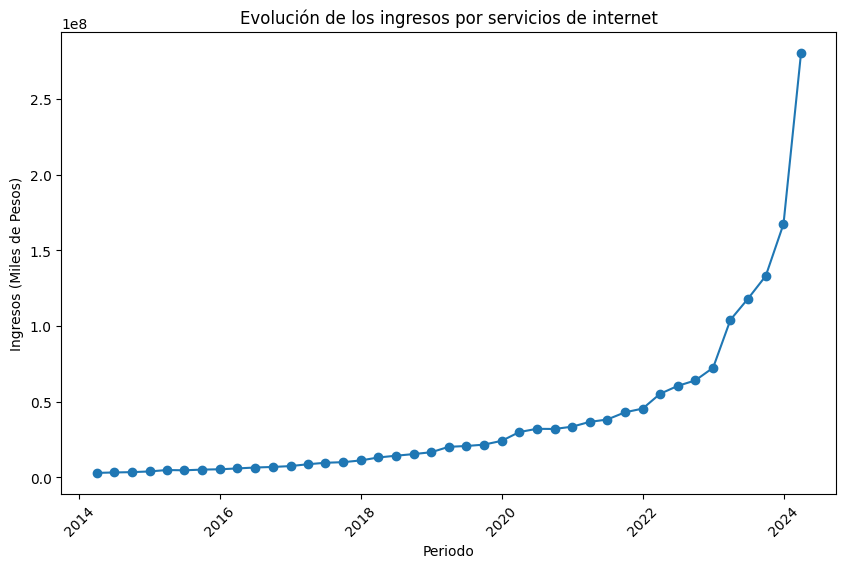

In [27]:
# Creamos una gráfica de línea para mostrar la evolución de los ingresos
plt.figure(figsize=(10, 6))
plt.plot(ingresos_df['periodo'], ingresos_df['ingresos_miles_de_pesos'], marker='o')
plt.title('Evolución de los ingresos por servicios de internet')
plt.ylabel('Ingresos (Miles de Pesos)')
plt.xlabel('Periodo')
plt.xticks(rotation=45)
plt.show()


**Crecimiento lento entre 2014 y 2020**

* Desde 2014 hasta aproximadamente 2020, los ingresos muestran un crecimiento moderado y constante. Los puntos de ingresos están muy juntos y cercanos al eje horizontal, lo que indica que durante este período los ingresos aumentaban de manera gradual, pero sin cambios bruscos.

* Este crecimiento puede estar relacionado con la penetración estable de internet en esos años, antes de la expansión masiva de la fibra óptica y el crecimiento acelerado del consumo de servicios digitales.

**Aceleración a partir de 2021**

* A partir de 2021, se observa una aceleración en el crecimiento de los ingresos. Los puntos de la gráfica comienzan a subir de manera más pronunciada, lo que sugiere que algo significativo ocurrió en este periodo para impulsar los ingresos.

* Esto podría coincidir con el impacto de la pandemia de COVID-19, donde la demanda de servicios de internet aumentó drásticamente debido al auge del trabajo remoto, la educación virtual y el entretenimiento en línea. Muchas empresas y personas dependieron más del internet, impulsando el consumo de datos y la inversión en tecnologías de conexión rápida.

**Crecimiento exponencial en 2023 y 2024**

* A partir de 2023, el gráfico muestra un crecimiento exponencial. Los ingresos se disparan rápidamente, pasando de alrededor de 100 millones de pesos a 280 millones de pesos en un corto período de tiempo.

* Este salto masivo en los ingresos puede estar vinculado al incremento en la adopción de fibra óptica, mejores planes de internet, y el aumento de la demanda por servicios de mayor velocidad y ancho de banda, tanto para hogares como para empresas. También podría estar relacionado con ajustes en los precios debido a la inflación o cambios en las tarifas.

**Tendencia proyectada**

Si bien el gráfico termina en 2024, la tendencia sugiere que este crecimiento continuará si la demanda por internet de alta velocidad sigue aumentando y las tecnologías más avanzadas, como la fibra óptica, continúan expandiéndose. Sin embargo, este tipo de crecimiento exponencial podría desacelerarse eventualmente a medida que el mercado alcance su punto de saturación, es decir, cuando la mayoría de la población tenga acceso a internet y la velocidad de expansión de la infraestructura se estabilice.

## 5.4. Ingresos por trimestre

Analicemos cómo varían los ingresos por trimestre para identificar si hay estacionalidad en los ingresos.

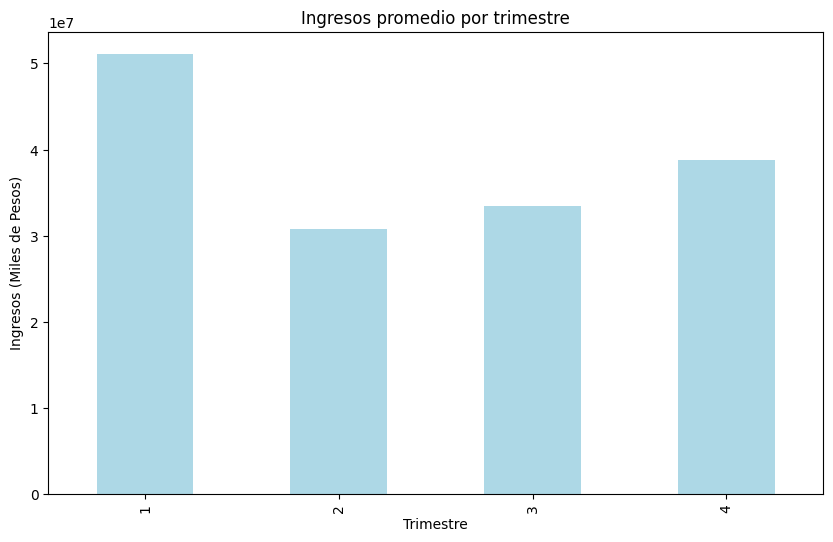

In [28]:
# Promedio de ingresos por trimestre
ingresos_por_trimestre = ingresos_df.groupby('trimestre')['ingresos_miles_de_pesos'].mean()

# Gráfico de barras para mostrar los ingresos promedio por trimestre
plt.figure(figsize=(10, 6))
ingresos_por_trimestre.plot(kind='bar', color='lightblue')
plt.title('Ingresos promedio por trimestre')
plt.ylabel('Ingresos (Miles de Pesos)')
plt.xlabel('Trimestre')
plt.show()


**Primer trimestre ($Q1$)**

* El primer trimestre es el que genera los mayores ingresos promedio, con más de 50 millones de pesos en promedio.

* Este pico podría deberse a varios factores, como una mayor demanda de servicios de internet tras las festividades y el inicio de nuevas actividades laborales y educativas después del periodo vacacional de fin de año. También puede haber promociones o nuevos contratos al comienzo del año, lo que impulsa los ingresos en esta época.

**Segundo trimestre ($Q2$)**

* El segundo trimestre muestra una caída significativa en los ingresos promedio, alcanzando un nivel de aproximadamente 30 millones de pesos.

* Este trimestre puede estar influenciado por la estabilidad de los contratos existentes y menos fluctuaciones en la demanda de servicios de internet. Las familias y empresas pueden estar manteniendo sus suscripciones sin muchos cambios.

* La caída en comparación con el primer trimestre podría también estar vinculada a un menor número de altas de nuevos contratos.

**Tercer trimestre ($Q3$)**

* El tercer trimestre muestra una leve recuperación en comparación con el segundo, con ingresos cercanos a los 40 millones de pesos en promedio.

* El crecimiento puede deberse al regreso a clases y a la reactivación de actividades comerciales después de las vacaciones de invierno, lo que genera un aumento en el uso y contratación de servicios de internet.

**Cuarto trimestre ($Q4$)**

* El cuarto trimestre también muestra una recuperación con respecto al segundo trimestre, con ingresos que superan ligeramente los 40 millones de pesos en promedio.

* El final del año suele ser un periodo de mayor actividad comercial y consumo debido a las festividades y promociones de fin de año, lo que podría generar una mayor demanda de internet, especialmente para compras en línea, streaming, y comunicación con familiares y amigos.